In [45]:
from abc import ABC, abstractmethod
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import beta
import copy
import numpy as np

In [46]:
class medicament():
    def __init__(self, indice_medicaments):
        self.indice_medicaments = indice_medicaments

    def medicamentFonctionne(self):
        if self.indice_medicaments == 0:
            return 0.3
        if self.indice_medicaments == 1:
            return 0.85
        if self.indice_medicaments == 2:
            return 0.1
        if self.indice_medicaments == 3:
            return 0.3
        if self.indice_medicaments == 4:
            return 0.5
        if self.indice_medicaments == 5:
            return 0.9
        if self.indice_medicaments == 6:
            return 0.4
        if self.indice_medicaments == 7:
            return 0.75
        if self.indice_medicaments == 8:
            return 0.1
        if self.indice_medicaments == 9:
            return 0.33
        else:
            return 0.0
        
    @staticmethod
    def donneListePiMedoc():
        liste_pi_medoc = []
        for i in range(10):
            medoc = medicament(i)
            liste_pi_medoc.append(medoc.medicamentFonctionne())
        return liste_pi_medoc

In [47]:
class patient() :
    
    def medicamentFonctionne(self,num_medicament):
        tempMedoc = medicament(num_medicament)
        tempTaux = random.random()
        tauxReel = tempMedoc.medicamentFonctionne()
        if tempTaux > tauxReel:
            return True
        else: return False
        
    def medicamentFonctionne1(self,num_medicament):
        tempMedoc = medicament(num_medicament)
        tempTaux = random.random()
        tauxReel = tempMedoc.medicamentFonctionne()
        if tempTaux > tauxReel:
            return 1
        else: return 0

In [48]:
class soignant():


    def findBestMedicIn30jours(self,listeMedoc) :
        # Initialisation des taux de succès pour chaque médicament
        success_rate = [0]*10
        failure_rate = [0]*10
        jour = 0
        nb_soigne = 0
        # Liste pour enregistrer le nombre de patients soignés à chaque jour
        taux_soigne = []
         
        while jour < 100:
            # Premier jour: test tous les medicaments dans la liste
            if jour == 0 :
                for i in listeMedoc:
                    monPatient1 = patient()
                    monPatient2 = patient()
                    result1= monPatient1.medicamentFonctionne(i) 
                    result2= monPatient2.medicamentFonctionne(i)
                    # Mise à jour des succès et échecs du médicament 1er jour
                    if result1:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                    # Mise à jour des succès et échecs du médicament 2ème jour
                    if result2:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                jour += 20
                # les meilleures médicaments sélectionné sont les 5 qui ont jusqu'à maintenant les plus de succès
                bestMedocs = sorted(range(len(success_rate)), key=lambda i: success_rate[i], reverse=True)[:int(round(len(listeMedoc)/2))]
                print("first try",bestMedocs)
            # Après 20 jours: focus sur les médicaments avec les meilleurs performances
            if jour == 20 :
                # passe 5 fois avec deux patients pour tester 10 médicaments au totale
                for i in bestMedocs:
                    monPatient1 = patient()
                    monPatient2 = patient()
                    result1= monPatient1.medicamentFonctionne(i) 
                    result2= monPatient2.medicamentFonctionne(i)
                    # Mise à jour des succès et échecs du médicament 1er jour  
                    if result1:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                    # Mise à jour des succès et échecs du médicament du 2ème jour
                    if result2:
                        success_rate[i] += 1
                        nb_soigne += 1
                    else :
                        failure_rate[i] += 1
                    taux_soigne.append(nb_soigne)
                # rajout des dix jours passés len(bestMedoc)=5
                jour += len(bestMedocs)*2
                bestMedocs = sorted(range(len(success_rate)), key=lambda i: success_rate[i], reverse=True)[:int(round(len(bestMedocs)/2)+1)]
                print("second",jour, bestMedocs)
                print("après les 30 premiers jours", taux_soigne)
            # phase final: continue de traiter les patients mais avec le meilleur médicament
            if jour != 0 and jour != 20 :
                notreMedoc = bestMedocs[0]
                monPatient1 = patient()
                result1= monPatient1.medicamentFonctionne(notreMedoc)
                # Mise à jour des succès et échecs du médicament
                if result1:
                    success_rate[i] += 1
                    nb_soigne += 1
                else :
                    failure_rate[i] += 1
                jour += 1
                # Mise à jour du nombre de soignés
                taux_soigne.append(nb_soigne)

        return taux_soigne
    
    def findBestMedicWithBeta(self,listeMedoc):
        # Initialisation des taux de succès pour chaque médicament
        success_rate = [0]*10
        failure_rate = [0]*10
        jour = 0
        nb_soigne = 0
        taux_soigne = []
        # Initialisation des résultats des médicaments
        results = [[0,0]*10]
        while jour < 100 :
            valeur = []
            
            for i in range(0,len(results)) :
                # Génération des valeurs aléatoires basées sur la loi Beta
                a = 1+results[i][0]
                β = 1+results[i][1]-results[i][0]
                valeur.append(np.random.beta(a, β))
            # Sélection du médicament ayant la valeur maximale
            bestMedoc:int =valeur.index(max(valeur))
            
            monPatient1 = patient()
            # Appel de la méthode pour tester le médicament sur le patient
            rep = monPatient1.medicamentFonctionne1(bestMedoc)
            # Mise à jour des résultats du médicament
            results[bestMedoc][0]+=rep
            results[bestMedoc][1]+=1
            
            i = bestMedoc
            if rep==1:
                success_rate[i] += 1
                nb_soigne += 1
            else :
                failure_rate[i] += 1
            taux_soigne.append(nb_soigne)
            jour+=1
        return taux_soigne
    
    def tracer_courbes(self, taux_soigne, title):
        jours = range(100)  # Nombre de jours
        plt.plot(jours, taux_soigne)
        plt.xlabel("Jours passés")
        plt.ylabel("Nombre de patients soignés")
        plt.title(title)
        plt.show()


first try [2, 3, 8, 0, 4]
second 30 [2, 3, 8]
après les 30 premiers jours [1, 1, 1, 1, 2, 3, 4, 5, 6, 6, 6, 6, 7, 7, 8, 8, 9, 10, 10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


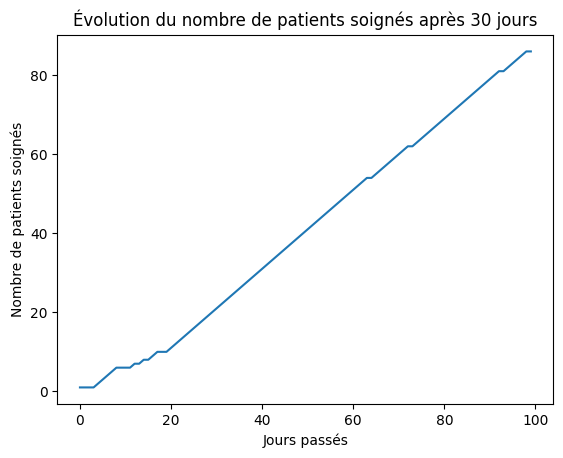

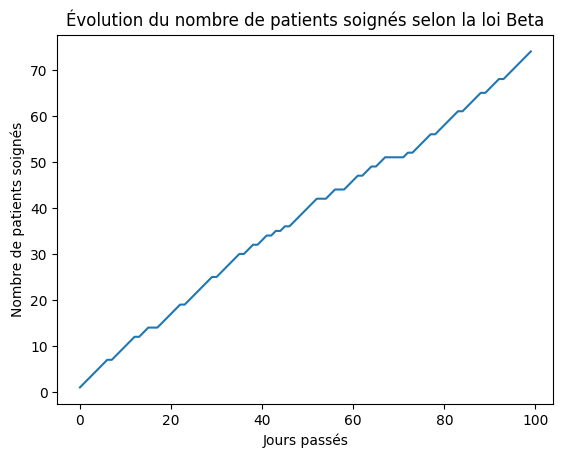

In [49]:
# Test
monSoignant = soignant()
# Utilisation de la fonction findBestMedicIn40jours()
listeMedoc = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
taux_soigne = monSoignant.findBestMedicIn30jours(listeMedoc)
monSoignant.tracer_courbes(taux_soigne, "Évolution du nombre de patients soignés après 30 jours")

# Utilisation de la fonction findBestMedicWithBeta()
listeMedoc = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
taux_soigne = monSoignant.findBestMedicWithBeta(listeMedoc)
monSoignant.tracer_courbes(taux_soigne, "Évolution du nombre de patients soignés selon la loi Beta")

In [50]:
'''
code pour généré la courbe selon la loi beta des valeurs pour chaque médicament
class Medicament:
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    
    def generateBetaValues(self):
        x = np.linspace(0, 1, 100)
        y = np.random.beta(self.alpha, self.beta, 100)
        return x, y
    
    # Définition des intervalles alpha et beta pour chaque médicament
    listeMedoc = [
        Medicament(1, 3),
        Medicament(2, 5),
        Medicament(3, 2),
        Medicament(4, 4),
        Medicament(2, 2)
    ]

    # Tracé des courbes pour chaque médicament
    plt.figure(figsize=(10, 6))
    for medoc in listeMedoc:
        x, y = medoc.generateBetaValues()
        plt.plot(x, y, label=f'Médicament {medoc.alpha}-{medoc.beta}')

    plt.xlabel('Valeur')
    plt.ylabel('Densité de probabilité')
    plt.title('Distribution des valeurs générées par la loi Beta pour chaque médicament')
    plt.legend()
    plt.show()
    '''

"\ncode pour généré la courbe selon la loi beta des valeurs pour chaque médicament\nclass Medicament:\n    def __init__(self, alpha, beta):\n        self.alpha = alpha\n        self.beta = beta\n    \n    def generateBetaValues(self):\n        x = np.linspace(0, 1, 100)\n        y = np.random.beta(self.alpha, self.beta, 100)\n        return x, y\n    \n    # Définition des intervalles alpha et beta pour chaque médicament\n    listeMedoc = [\n        Medicament(1, 3),\n        Medicament(2, 5),\n        Medicament(3, 2),\n        Medicament(4, 4),\n        Medicament(2, 2)\n    ]\n\n    # Tracé des courbes pour chaque médicament\n    plt.figure(figsize=(10, 6))\n    for medoc in listeMedoc:\n        x, y = medoc.generateBetaValues()\n        plt.plot(x, y, label=f'Médicament {medoc.alpha}-{medoc.beta}')\n\n    plt.xlabel('Valeur')\n    plt.ylabel('Densité de probabilité')\n    plt.title('Distribution des valeurs générées par la loi Beta pour chaque médicament')\n    plt.legend()\n    pl